# Technical Analysis 
Technical analysis based on historical price information is a typical task finance professionals and interested amateurs engage in. On Wikipedia you find the following definition: 
* In finance, technical analysis is a security analysis methodology for forecasting the direction of prices through the study of past market data, primarily price and volume.



In [1]:
import numpy as np
import pandas as pd
import pandas.io.data as web
import matplotlib

%matplotlib inline

C:\Users\tttri\Anaconda3\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
sp500 =web.DataReader('^GSPC', data_source='yahoo',start = '1/1/2000', end = '5/25/2016')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4125 entries, 2000-01-03 to 2016-05-25
Data columns (total 6 columns):
Open         4125 non-null float64
High         4125 non-null float64
Low          4125 non-null float64
Close        4125 non-null float64
Volume       4125 non-null int64
Adj Close    4125 non-null float64
dtypes: float64(5), int64(1)
memory usage: 225.6 KB


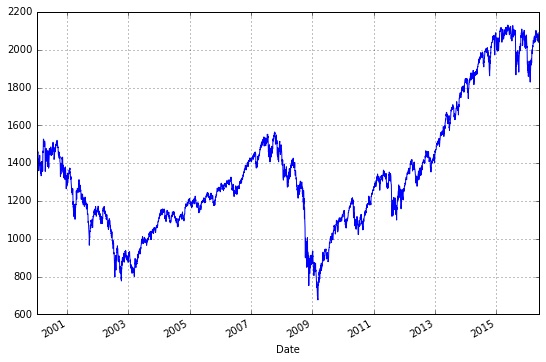

In [3]:
sp500['Close'].plot(grid = True, figsize = (9,6))

## Trend Strategies
These are based on moving average of a trailing number of observations, N. We'll look at 42 day (two months) and 252 day (1 year) trends.

In [4]:
sp500['42d'] = np.round(pd.rolling_mean(sp500['Close'],window=42),2)
sp500['252d'] = np.round(pd.rolling_mean(sp500['Close'],window=252),2)

In [5]:
sp500.tail()

,Open,High,Low,Close,Volume,Adj Close,42d,252d
Date,,,,,,,,
2016-05-19,2044.209961,2044.209961,2025.910034,2040.040039,3846770000,2040.040039,2065.43,2029.45
2016-05-20,2041.880005,2058.350098,2041.880005,2052.320068,3507650000,2052.320068,2065.49,2029.13
2016-05-23,2052.229980,2055.580078,2047.260010,2048.040039,3055480000,2048.040039,2065.76,2028.82
2016-05-24,2052.649902,2079.669922,2052.649902,2076.060059,3627340000,2076.060059,2066.71,2028.71
2016-05-25,2078.929932,2094.729980,2078.929932,2090.540039,3859160000,2090.540039,2067.99,2028.58


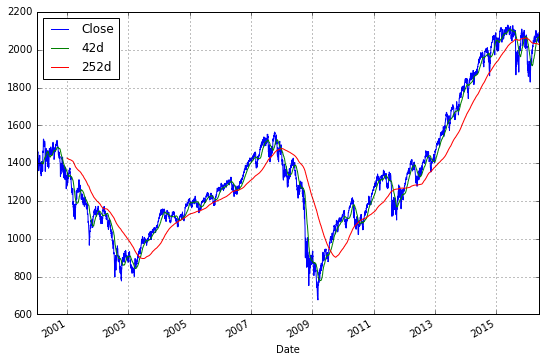

In [6]:
sp500[['Close', '42d','252d']].plot(grid = True, figsize = (9,6))

## Create trading rules
Now that the data set is complete, we can create trading rules that act on the data and determine when to buy, sell or hold.

* Buy signal (go long) the 42d trend is for the first time SD points above the 252d trend. 
* Hold (park in cash) the 42d trend is within a range of +/– SD points around the 252d trend.
* Sell signal (go short) the 42d trend is for the first time SD points below the 252d trend.



In [8]:
sp500['MonthYearDiff'] = sp500['42d'] -sp500['252d']

In [12]:
# Set the threshold
SD = 50

#This column will set the buy/sell/hold parameter for each trading period
sp500['regime'] = np.where(sp500['MonthYearDiff'] > SD,1,0)
sp500['regime'] = np.where(sp500['MonthYearDiff'] < SD,-1,sp500['regime'])

In [13]:
sp500['regime'].value_counts()

-1    2061
 1    1813
 0     251
Name: regime, dtype: int64

(-1.1, 1.1)

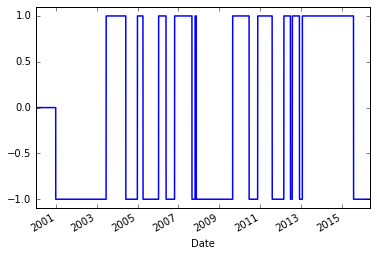

In [32]:
plt = sp500['regime'].plot(lw=1.5)
plt.set_ylim(-1.1,1.1)

## Calculating returns
We're ignoring trading costs and assuming cash earns no interest. We can therefore calculate daily log returns for both the market and our strategy:

In [33]:
sp500['Market'] = np.log(sp500['Close']/sp500['Close'].shift(1))
sp500['Strategy'] = sp500['regime'].shift(1) * sp500['Market']

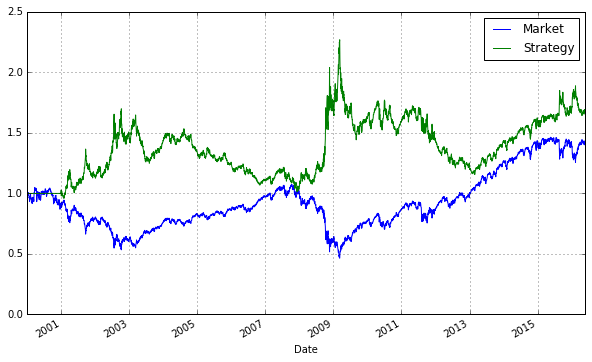

In [35]:
# Plotting the cumulative return of the market vs. strategy:
sp500[['Market','Strategy']].cumsum().apply(np.exp).plot(grid = True, figsize = (10,6))